# **Bike Sharing Demand Prediction**

### **Objective:**
The objective of this project is to develop a predictive model that can accurately forecast the demand for bike rentals on an hourly basis. By understanding the factors influencing bike rentals, the model aims to assist the bike-sharing service in optimizing its operations, managing bike inventory, and enhancing customer satisfaction.

### **Background:**
Bike-sharing systems have gained popularity as an eco-friendly and convenient mode of urban transportation. Accurate demand prediction is crucial for these systems to function efficiently. It enables better allocation of bikes, reduces customer wait times, and ensures availability across different locations. Effective demand forecasting can lead to cost savings, improved service quality, and increased user satisfaction.

### **Data Description:**
The dataset contains historical data on bike rentals, along with various environmental and seasonal information. The key features in the dataset include:

1. Date: Timestamp of the record. Rented_Bike_Count: Number of bikes rented at each hour.
2. Temperature(°C): Hourly temperature in Celsius.
3. Humidity(%): Hourly humidity in percentage.
4. Wind_speed(m/s): Hourly wind speed in meters per second.
5. Visibility(10m): Hourly visibility in meters.
6. Dew_point_temperature(°C): Dew point temperature in Celsius.
7. Solar_Radiation(MJ/m2): Hourly solar radiation in megajoules per square meter.
8. Rainfall(mm): Hourly rainfall in millimeters.
9. Snowfall(cm): Hourly snowfall in centimeters.
10. Seasons: Seasons (Winter, Spring, Summer, Fall).
11. Holiday: Whether the day is a holiday or not.
12. Functioning Day: Whether the day is a functioning day or not.


# Data Preprocessing and Skewness Correction

This notebook demonstrates the steps involved in preprocessing the data, including handling duplicates, transforming date columns, outlier removal, and skewness correction for numerical features.

## Steps Involved

1. Checking duplicate and missing values
2. Changing the "Date" column into three "year", "month", and "day" columns
3. Calculating skewness for each numerical feature before outlier removal or any transformations
4. Checking for distribution and the skewness by plotting Box plot and Distribution plot
5. Outlier removal using the IQR method by replacing values that are above the upper bound with the upper bound or below the lower bound with the lower bound
6. Checking for distribution and the skewness by plotting Box plot and Distribution plot after outlier removal
7. Normalising the numerical columns and their distribution using different transformations after outlier removal:
   - Normalise `Rented_Bike_Count`: Apply Square root transformation to achieve a normal distribution
   - Normalise other numerical variables: Apply log transformations to achieve a distribution close to normal
8. Checking for distribution and the skewness by plotting Box plot and Distribution plot after outlier removal and transformations

In [1]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
df = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding ='latin')

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# View the data of bottom 5 rows to take a glimps of the data
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Dataset Rows & Columns count
print(df.shape)

(8760, 14)


In [7]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Checking the no of duplicate values
value = len(df[df.duplicated()])
value

0

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
#Looking for the description of the dataset to get insights of the data
df.describe().T   # (include = 'all')

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


**Features description**

- **Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.
- **Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int
- **Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.
- **Temperature(°C)**: Temperature in Celsius, type : Float
- **Humidity(%)**: Humidity in the air in %, type : int
- **Wind speed (m/s)** : Speed of the wind in m/s, type : Float
- **Visibility (10m)**: Visibility in m, type : int
- **Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float
- **Solar Radiation (MJ/m2)**: Sun contribution, type : Float
- **Rainfall(mm)**: Amount of raining in mm, type : Float
- **Snowfall (cm)**: Amount of snowing in cm, type : Float
- **Seasons**: Season of the year, type : str, there are only 4 season's in data
- **Holiday**: If the day  is holiday period or not, type: str
- **Functioning Day**: If the day is a Functioning Day or not, type : str

### Summary

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so (365*24) = 8760, which represents the number of line in the dataset
* There are no duplicate and null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

In [13]:
#Rename the complex columns name
bike_df = df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature(°C)',
                                'Humidity(%)':'Humidity(%)',
                                'Wind speed (m/s)':'Wind_speed(m/s)',
                                'Visibility (10m)':'Visibility(10m)',
                                'Dew point temperature(°C)':'Dew_point_temperature(°C)',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation(MJ/m2)',
                                'Rainfall(mm)':'Rainfall(mm)',
                                'Snowfall (cm)':'Snowfall(cm)',
                                'Functioning Day':'Functioning_Day'})

##Breaking date column

In [14]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [15]:
# Changing the "Date" column into three "year","month","day" column
# bike_df['Date'] = bike_df['Date'].str.replace('-', '/')
bike_df['Date'] = bike_df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day_name()

In [16]:
#creating a new column of "weekdays_weekend" and drop the column "Date", "year"
bike_df['Weekdays_Weekend'] = bike_df['Day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','Year'],axis=1)

In [17]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_Weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0


In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented_Bike_Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind_speed(m/s)            8760 non-null   float64
 5   Visibility(10m)            8760 non-null   int64  
 6   Dew_point_temperature(°C)  8760 non-null   float64
 7   Solar_Radiation(MJ/m2)     8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall(cm)               8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning_Day            8760 non-null   object 
 13  Month                      8760 non-null   int32

In [19]:
# Changing the datatype of Hour, Season, Holiday, Functioning Day, Month, Day, Weekdays_Weekend column into catagory column
cols=['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
for col in cols:
  bike_df[col] = bike_df[col].astype('category')

In [20]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented_Bike_Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind_speed(m/s)            8760 non-null   float64 
 5   Visibility(10m)            8760 non-null   int64   
 6   Dew_point_temperature(°C)  8760 non-null   float64 
 7   Solar_Radiation(MJ/m2)     8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall(cm)               8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  Functioning_Day            8760 non-null   category
 13  Month                      8760 n

In [21]:
# Identify categorical variables
categorical_variables = [var for var in bike_df.columns if bike_df[var].dtype in ['category']]

# Identify numerical variables
numerical_variables = [var for var in bike_df.columns if bike_df[var].dtype in ['int64', 'float64']]

print(categorical_variables)
print(numerical_variables)

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Dew_point_temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)']


In [22]:
cat_df = bike_df[categorical_variables]
for i in cat_df.columns:
  print(cat_df[i].value_counts())
  print('--'*50)

Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Functioning_Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Month
1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     7

## Summary:

* So we convert the "date" column into 3 different column i.e "year","month","day"
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column
* I have assigned the vale Weekday = 0, and Weekend = 1

## **Exploratory Data Analysis**

**1. Bar Chart**

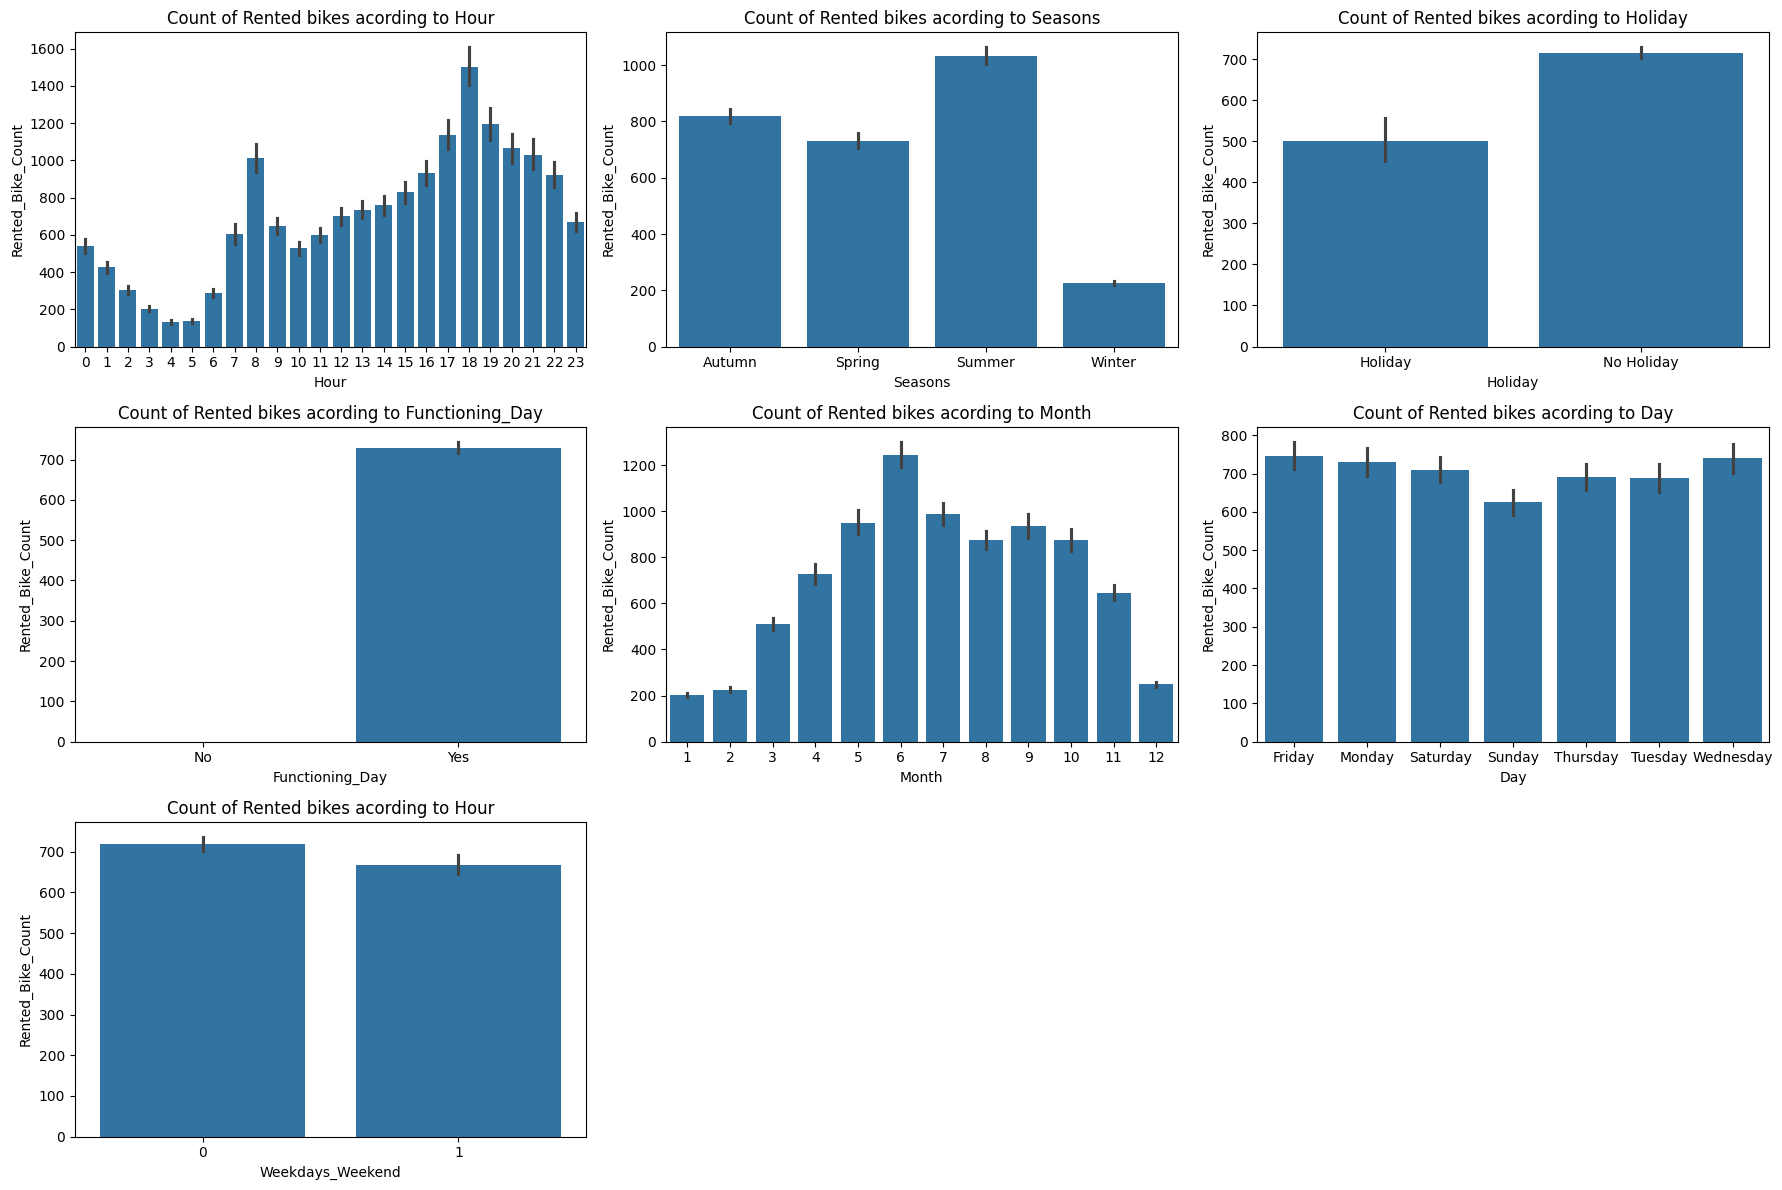

In [23]:
# Subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# 1. Hour to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Hour', y = 'Rented_Bike_Count', ax = axes[0, 0])
axes[0, 0].set(title = 'Count of Rented bikes acording to Hour')

# 2. Seasons to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Seasons', y = 'Rented_Bike_Count', ax = axes[0, 1])
axes[0, 1].set(title = 'Count of Rented bikes acording to Seasons')

# 3. Holiday to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Holiday', y = 'Rented_Bike_Count', ax = axes[0, 2])
axes[0, 2].set(title = 'Count of Rented bikes acording to Holiday')

# 4. Functioning_Day to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Functioning_Day', y = 'Rented_Bike_Count', ax = axes[1, 0])
axes[1, 0].set(title = 'Count of Rented bikes acording to Functioning_Day')

# 5. Month to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Month', y = 'Rented_Bike_Count', ax = axes[1, 1])
axes[1, 1].set(title = 'Count of Rented bikes acording to Month')

# 6. Day to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Day', y = 'Rented_Bike_Count', ax = axes[1, 2])
axes[1, 2].set(title = 'Count of Rented bikes acording to Day')

# 7. Weekdays_Weekend to Rented_Bike_Count
sns.barplot(data = bike_df, x = 'Weekdays_Weekend', y = 'Rented_Bike_Count', ax = axes[2, 0])
axes[2, 0].set(title = 'Count of Rented bikes acording to Hour')

# Hide the empty subplots (2, 1) and (2, 2) if there are less than 9 plots
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**2. Line Plots**

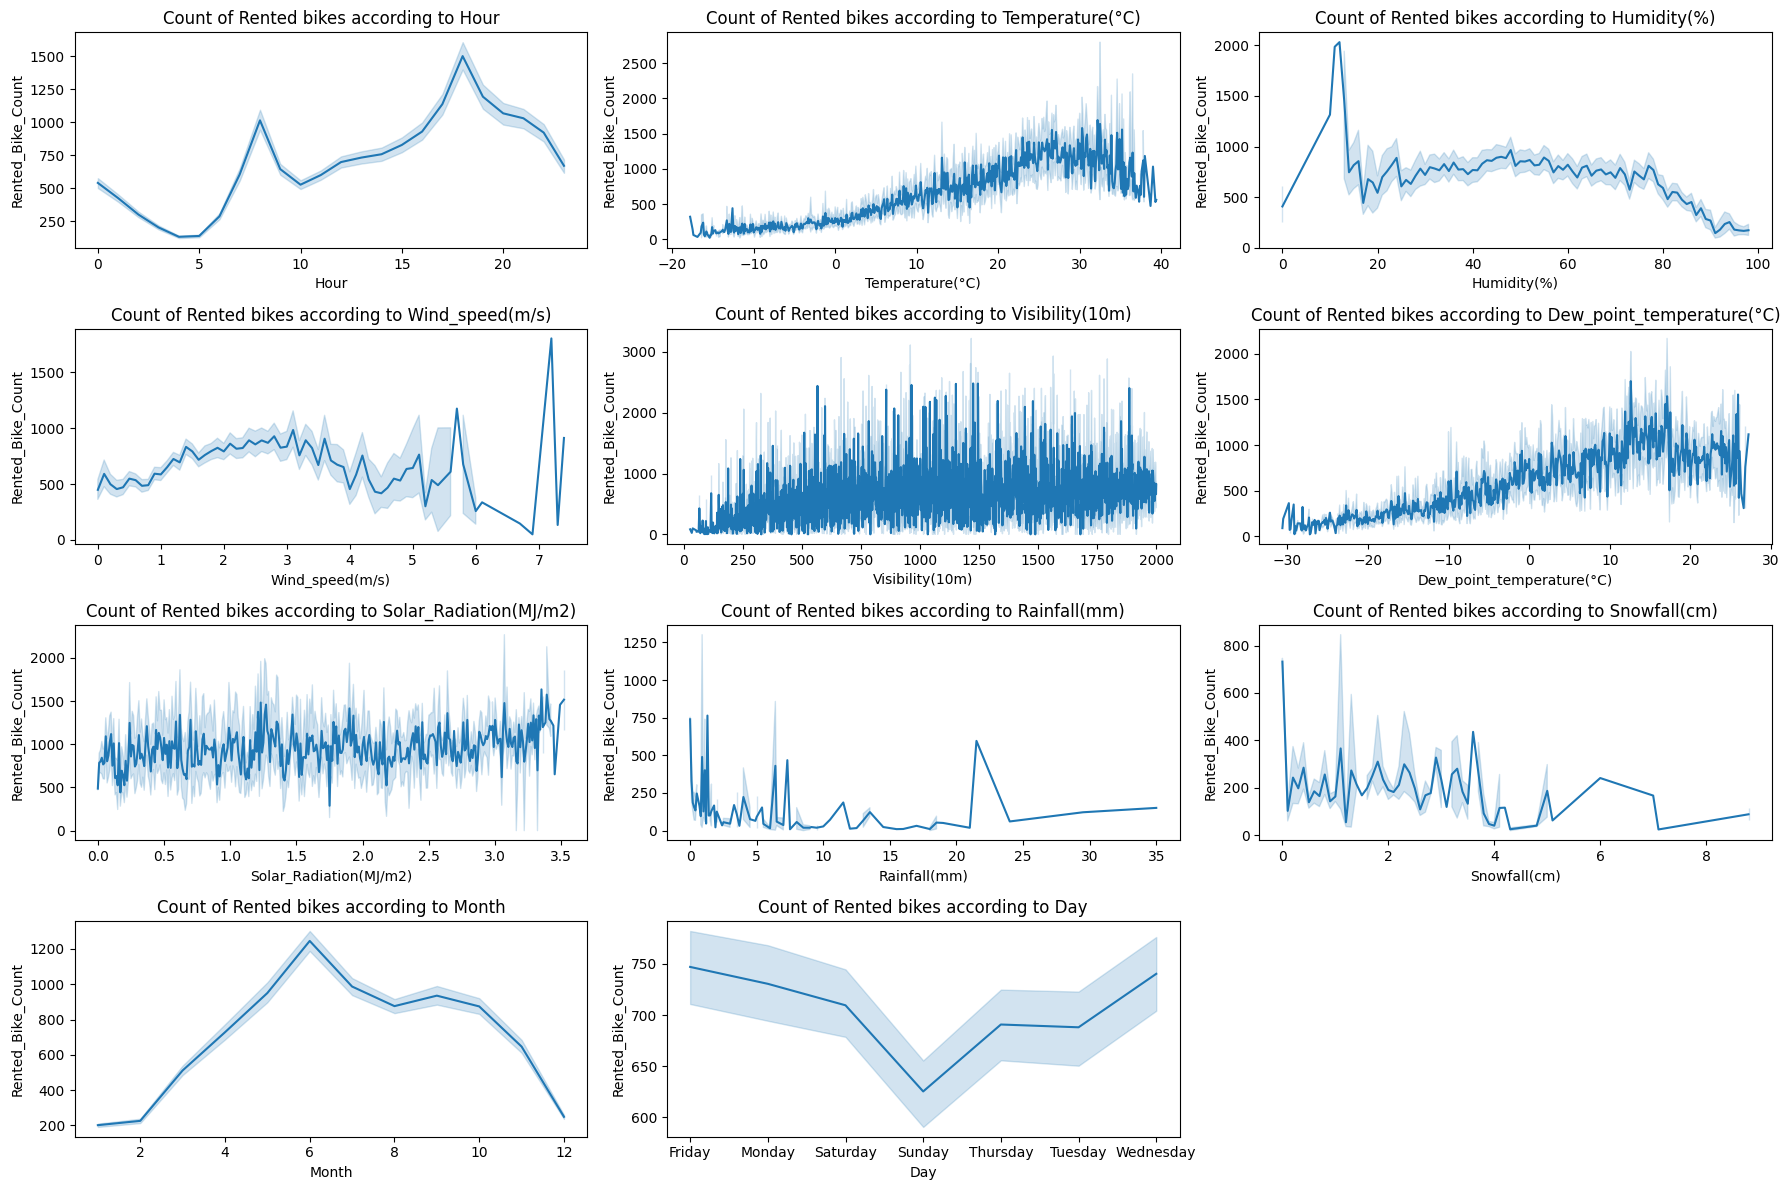

In [24]:
# 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Dew_point_temperature(°C)',
# 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Month', 'Day'

# Subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))

# 1. Hour to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Hour', y = 'Rented_Bike_Count', ax = axes[0, 0])
axes[0, 0].set(title = 'Count of Rented bikes according to Hour')

# 2. Temperature(°C) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Temperature(°C)', y = 'Rented_Bike_Count', ax = axes[0, 1])
axes[0, 1].set(title = 'Count of Rented bikes according to Temperature(°C)')

# 3. Humidity(%) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Humidity(%)', y = 'Rented_Bike_Count', ax = axes[0, 2])
axes[0, 2].set(title = 'Count of Rented bikes according to Humidity(%)')

# 4. Wind_speed(m/s) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Wind_speed(m/s)', y = 'Rented_Bike_Count', ax = axes[1, 0])
axes[1, 0].set(title = 'Count of Rented bikes according to Wind_speed(m/s)')

# 5. Visibility(10m) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Visibility(10m)', y = 'Rented_Bike_Count', ax = axes[1, 1])
axes[1, 1].set(title = 'Count of Rented bikes according to Visibility(10m)')

# 6. Dew_point_temperature(°C) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Dew_point_temperature(°C)', y = 'Rented_Bike_Count', ax = axes[1, 2])
axes[1, 2].set(title = 'Count of Rented bikes according to Dew_point_temperature(°C)')

# 7. Solar_Radiation(MJ/m2) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Solar_Radiation(MJ/m2)', y = 'Rented_Bike_Count', ax = axes[2, 0])
axes[2, 0].set(title = 'Count of Rented bikes according to Solar_Radiation(MJ/m2)')

# 8. Rainfall(mm) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Rainfall(mm)', y = 'Rented_Bike_Count', ax = axes[2, 1])
axes[2, 1].set(title = 'Count of Rented bikes according to Rainfall(mm)')

# 9. Snowfall(cm) to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Snowfall(cm)', y = 'Rented_Bike_Count', ax = axes[2, 2])
axes[2, 2].set(title = 'Count of Rented bikes according to Snowfall(cm)')

# 10. Month to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Month', y = 'Rented_Bike_Count', ax = axes[3, 0])
axes[3, 0].set(title = 'Count of Rented bikes according to Month')

# 11. Day to Rented_Bike_Count
sns.lineplot(data = bike_df, x = 'Day', y = 'Rented_Bike_Count', ax = axes[3, 1])
axes[3, 1].set(title = 'Count of Rented bikes according to Day')

# Hide the empty subplots (3, 2) if there are less than 9 plots
fig.delaxes(axes[3, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# line_plot_variables = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Dew_point_temperature(°C)',
#                        'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)', 'Month', 'Day']
# for var in line_plot_variables:
#   plt.figure(figsize = (8,5))
#   ax = sns.lineplot(x = var, y = 'Rented_Bike_Count', data = bike_df)
#   ax.set_title(f'Lineplot of {var} against Rented Bike Count')
#   plt.show()

**3. Regression Plots**

In [25]:
print(numerical_variables)

['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Dew_point_temperature(°C)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)']


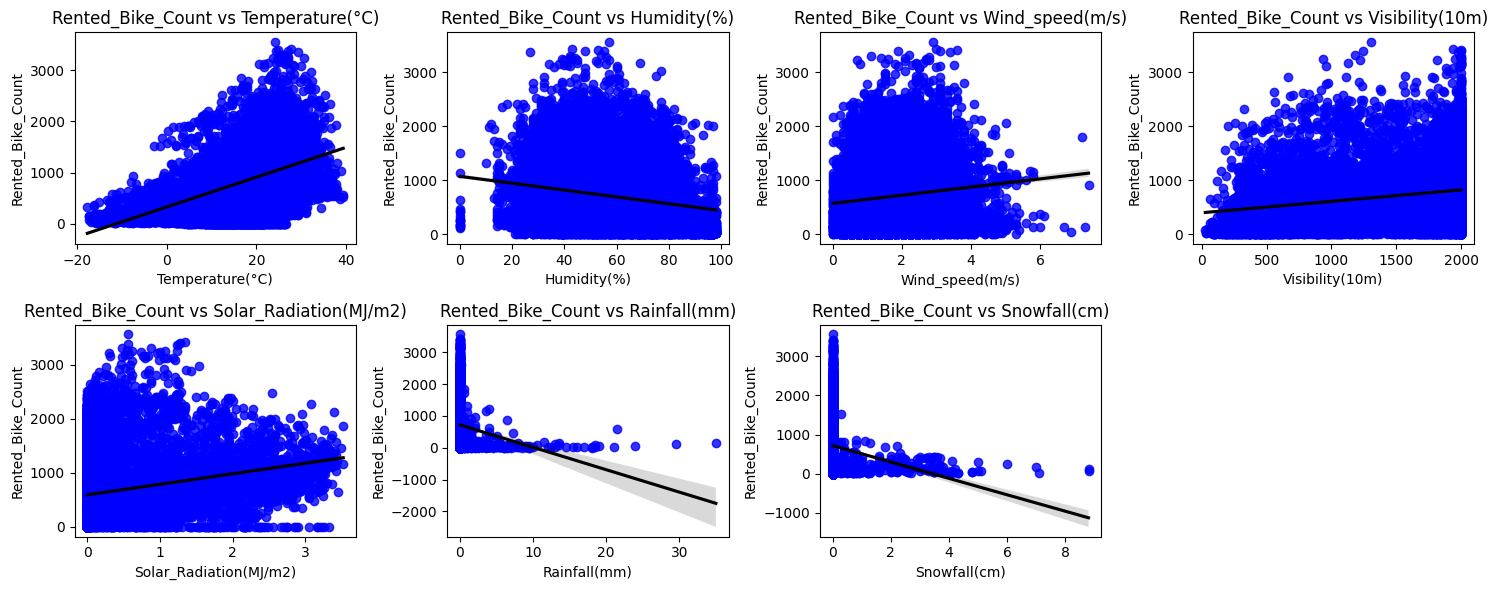

In [26]:
# Regression plot for all the numerical features

# List of numeric columns to plot against 'Rented_Bike_Count'
numeric_cols = ['Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)']
target_col = 'Rented_Bike_Count'

# Determine the number of rows and columns for the grid
num_plots = len(numeric_cols)
num_cols =  4 # Number of columns in the grid
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numeric column and create a regression plot
for idx, col in enumerate(numeric_cols):
    sns.regplot(x=col, y=target_col, data=bike_df, scatter_kws={"color": 'blue'}, line_kws={"color": "black"}, ax=axes[idx])
    axes[idx].set_title(f'{target_col} vs {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel(target_col)

# Remove any unused subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**4. Correlation Heatmap**

In [29]:
# Calculate the correlation matrix
num_features = bike_df.select_dtypes(include=[float, int])
corr = num_features.corr()
corr

,Rented_Bike_Count,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Dew_point_temperature(°C),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm)
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed(m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility(10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation(MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall(cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


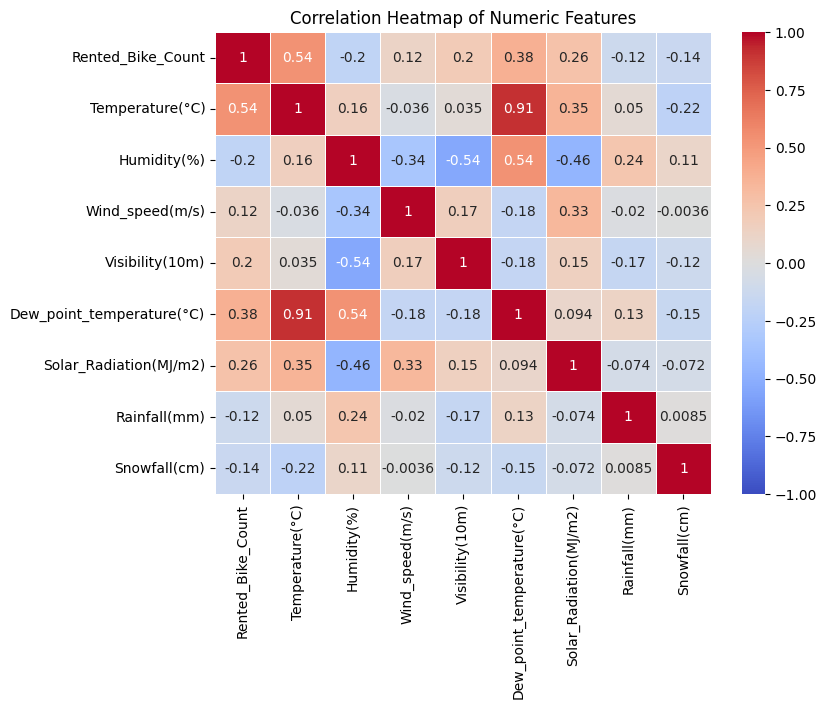

In [30]:
# Plotting the correlation heatmap
plt.figure(figsize=(8, 6))
# Mask to hide the upper triangle
# mask = np.triu(np.ones_like(correlation, dtype=bool))

# Create a heatmap
sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True,  linewidths=0.5)   #mask=mask,
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [31]:
# drop the Dew point temperature column
bike_df = bike_df.drop(['Dew_point_temperature(°C)'],axis=1)

In [32]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Rented_Bike_Count       8760 non-null   int64   
 1   Hour                    8760 non-null   category
 2   Temperature(°C)         8760 non-null   float64 
 3   Humidity(%)             8760 non-null   int64   
 4   Wind_speed(m/s)         8760 non-null   float64 
 5   Visibility(10m)         8760 non-null   int64   
 6   Solar_Radiation(MJ/m2)  8760 non-null   float64 
 7   Rainfall(mm)            8760 non-null   float64 
 8   Snowfall(cm)            8760 non-null   float64 
 9   Seasons                 8760 non-null   category
 10  Holiday                 8760 non-null   category
 11  Functioning_Day         8760 non-null   category
 12  Month                   8760 non-null   category
 13  Day                     8760 non-null   category
 14  Weekdays_Weekend        

**Conclusions:**

- Customers favour renting bikes more in the evening time
- Customers prefer renting bikes more in summer and that to in the month of June
- Mostly people prefer renting bikes on a Functioning day that is a Weekday and also when there is No Holiday
- Least preferable day of the week to rent a bike is Sunday
- We see that, people like to ride bikes when it is pretty hot around 25°C in average
- For "Dew_point_temperature', it is almost same as the 'Temperature'
- The amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000
- We can see from the plot that, on the y-axis, the amount of rented bike is very low. When we have more than 4 cm of snow, the bike rents is much lower
- We can see from the above plot that, even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes
- We can see from the above plot that, the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind is 7 m/s then the demand of bike also increase that clearly means people love to ride bikes when its little windy


* Regression plot
  - **Positively relation** (rented bike count increases with increase of these features): 'Temperature(°C)', 'Wind_speed(m/s)', 'Dew_point_temperature(°C)', 'Solar_Radiation(MJ/m2)'.
  - **Negatively related** (rented bike count decreases with increase of these features): 'Humidity(%)', 'Visibility(10m)', 'Rainfall(mm)', 'Snowfall(cm)'.

* Dropped the 'Dew_point_temperature(°C)' column as it shows very high multicollinearity with 'Temperature(°C)' column

**Check for Outliers and Skewness of our numerical features**

In [37]:
# Identify numerical variables
numerical_variables_updated = [var for var in bike_df.columns if bike_df[var].dtype in ['int64', 'float64']]

print(categorical_variables)
print(numerical_variables_updated)

['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month', 'Day', 'Weekdays_Weekend']
['Rented_Bike_Count', 'Temperature(°C)', 'Humidity(%)', 'Wind_speed(m/s)', 'Visibility(10m)', 'Solar_Radiation(MJ/m2)', 'Rainfall(mm)', 'Snowfall(cm)']


In [38]:
# Import necessary libraries for statistical distributions
from scipy.stats import norm

In [39]:
# Initialize an empty list to store skewness information
skewness_info = []

# Calculate skewness for each numerical feature
for var in numerical_variables_updated:
    # Calculate skewness
    skewness = bike_df[var].skew()
    skewness_type = "Neutral"
    if skewness > 0:
        skewness_type = "Positive"
    elif skewness < 0:
        skewness_type = "Negative"

    # Append skewness information to the list
    skewness_info.append([var, skewness, skewness_type])

# Create a DataFrame to display skewness information
skewness_df = pd.DataFrame(skewness_info, columns=['Variable', 'Skewness', 'Skewness Type'])

# Display the DataFrame
print(skewness_df)

                 Variable   Skewness Skewness Type
0       Rented_Bike_Count   1.153428      Positive
1         Temperature(°C)  -0.198326      Negative
2             Humidity(%)   0.059579      Positive
3         Wind_speed(m/s)   0.890955      Positive
4         Visibility(10m)  -0.701786      Negative
5  Solar_Radiation(MJ/m2)   1.504040      Positive
6            Rainfall(mm)  14.533232      Positive
7            Snowfall(cm)   8.440801      Positive


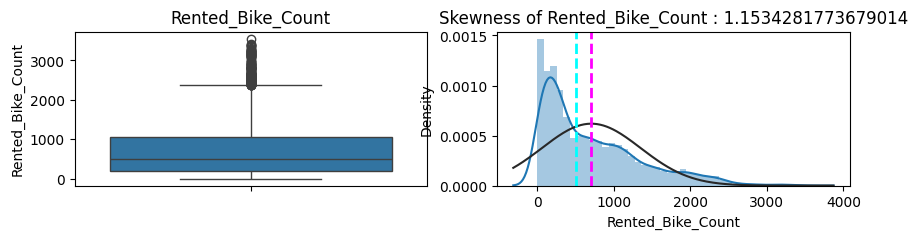

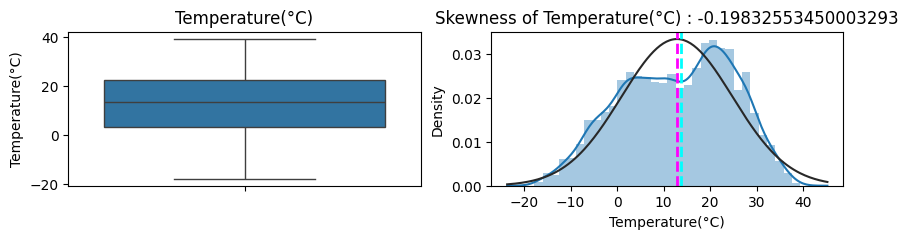

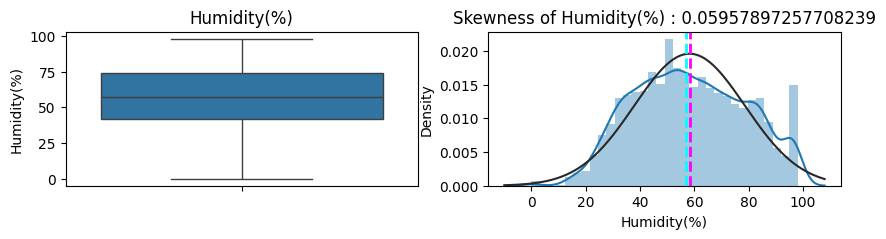

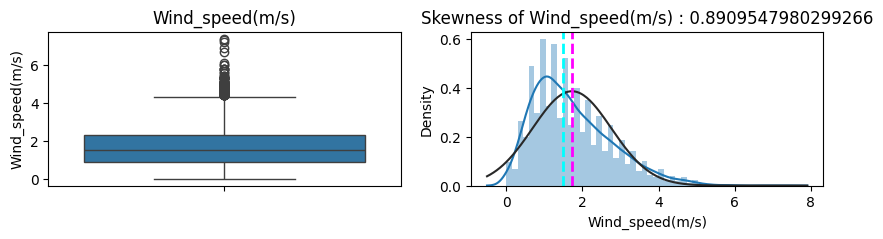

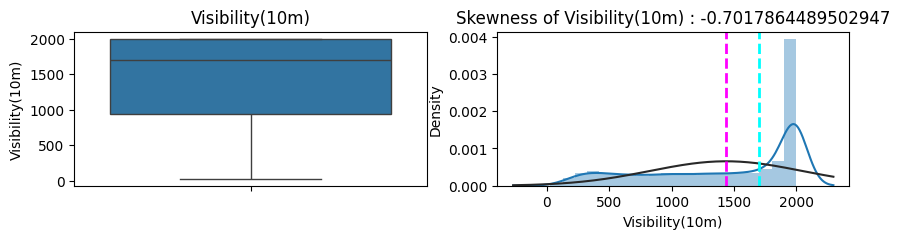

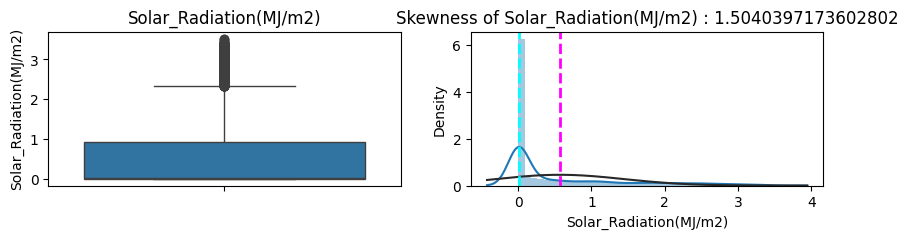

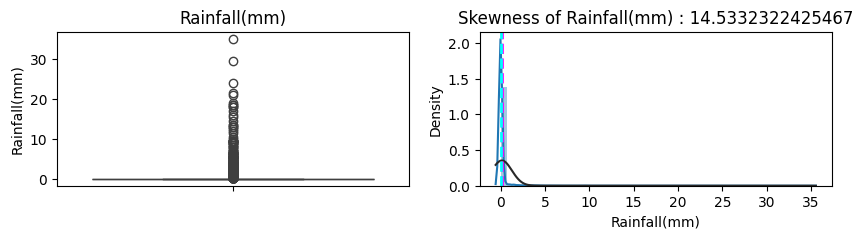

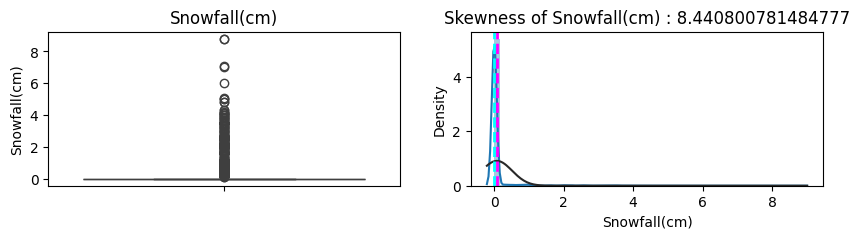

In [40]:
# Plotting Box plot and Distribution plot
for var in numerical_variables_updated:
    plt.figure(figsize=(10, 2))

    # Box plot
    plt.subplot(1, 2, 1)
    ax = sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    # Distribution plot
    plt.subplot(1, 2, 2)
    ax = sns.distplot(bike_df[var], fit=norm)
    ax.axvline(bike_df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(bike_df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'Skewness of {var} : {bike_df[var].skew()}')

    plt.show()

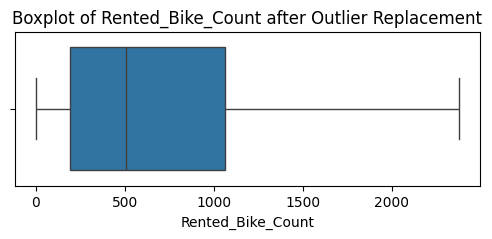

Feature: Rented_Bike_Count
Q1 (25th percentile): 191.0
Q3 (75th percentile): 1065.25
IQR: 874.25
Lower Bound: -1120.375
Upper Bound: 2376.625
New minimum value: 0.0
New maximum value: 2376.625



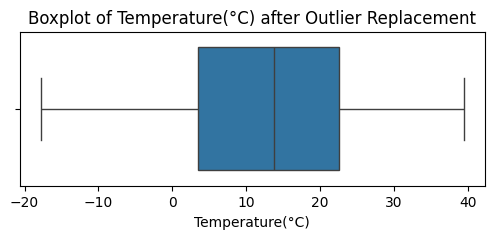

Feature: Temperature(°C)
Q1 (25th percentile): 3.5
Q3 (75th percentile): 22.5
IQR: 19.0
Lower Bound: -25.0
Upper Bound: 51.0
New minimum value: -17.8
New maximum value: 39.4



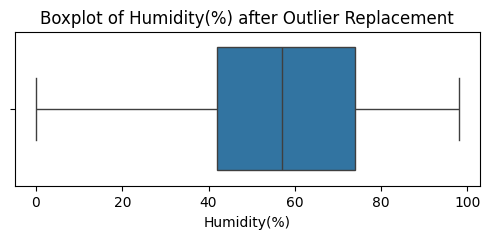

Feature: Humidity(%)
Q1 (25th percentile): 42.0
Q3 (75th percentile): 74.0
IQR: 32.0
Lower Bound: -6.0
Upper Bound: 122.0
New minimum value: 0.0
New maximum value: 98.0



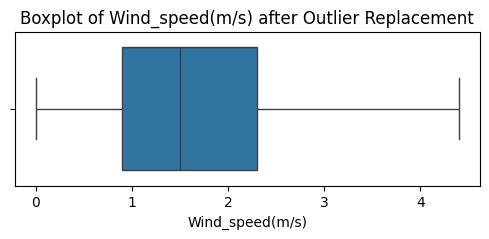

Feature: Wind_speed(m/s)
Q1 (25th percentile): 0.9
Q3 (75th percentile): 2.3
IQR: 1.4
Lower Bound: -1.1999999999999997
Upper Bound: 4.3999999999999995
New minimum value: 0.0
New maximum value: 4.3999999999999995



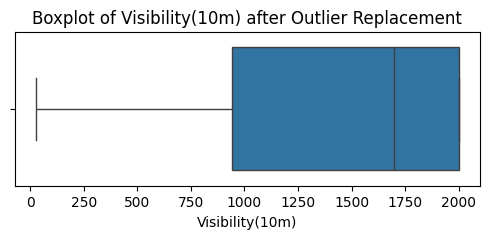

Feature: Visibility(10m)
Q1 (25th percentile): 940.0
Q3 (75th percentile): 2000.0
IQR: 1060.0
Lower Bound: -650.0
Upper Bound: 3590.0
New minimum value: 27.0
New maximum value: 2000.0



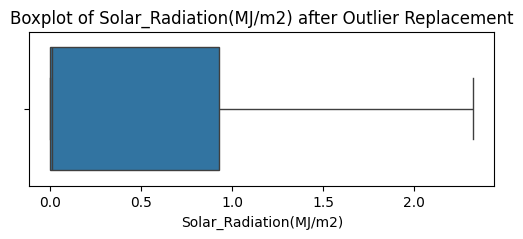

Feature: Solar_Radiation(MJ/m2)
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.93
IQR: 0.93
Lower Bound: -1.395
Upper Bound: 2.325
New minimum value: 0.0
New maximum value: 2.325



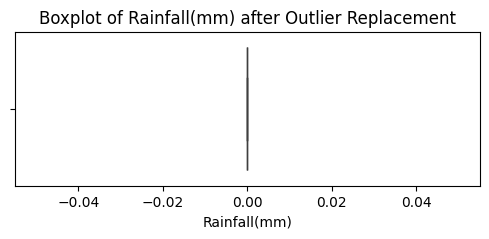

Feature: Rainfall(mm)
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
New minimum value: 0.0
New maximum value: 0.0



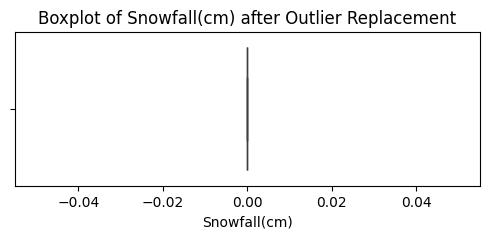

Feature: Snowfall(cm)
Q1 (25th percentile): 0.0
Q3 (75th percentile): 0.0
IQR: 0.0
Lower Bound: 0.0
Upper Bound: 0.0
New minimum value: 0.0
New maximum value: 0.0

DataFrame shape: (8760, 15)


In [42]:
# Define the IQR technique function for detecting outliers
def iqr_technique(bike_data):
    Q1 = np.percentile(bike_data, 25)
    Q3 = np.percentile(bike_data, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return Q1, Q3, IQR, lower_range, upper_range

# Iterate over each numerical feature to handle outliers
for feature in numerical_variables_updated:
    # Calculate the Q1, Q3, IQR, lower bound, and upper bound for the current feature
    Q1, Q3, IQR, lower_bound, upper_bound = iqr_technique(bike_df[feature])

    # # Method 1: Filter the DataFrame to remove outliers from the 'Rented_Bike_Count' column
    # bike_df = bike_df[(bike_df['price'] > lower_bound) & (bike_df['price'] < upper_bound)]

    # # Method 2: Replace the values in the current feature that are above the upper bound or below the lower bound
    bike_df[feature] = np.where(bike_df[feature] > upper_bound, upper_bound,
                                np.where(bike_df[feature] < lower_bound, lower_bound, bike_df[feature]))

    # Visualize the current feature with a boxplot to check the result after outlier replacement
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=bike_df[feature])
    plt.title(f'Boxplot of {feature} after Outlier Replacement')
    plt.xlabel(feature)
    plt.show()

    # Print the Q1, Q3, IQR, lower bound, and upper bound values for the current feature
    print(f'Feature: {feature}')
    print(f'Q1 (25th percentile): {Q1}')
    print(f'Q3 (75th percentile): {Q3}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')

    # Print the new minimum and maximum values of the current feature
    new_min = bike_df[feature].min()
    new_max = bike_df[feature].max()
    print(f'New minimum value: {new_min}')
    print(f'New maximum value: {new_max}')
    print()

# Print the shape of the DataFrame to confirm no rows were removed
print(f'DataFrame shape: {bike_df.shape}')

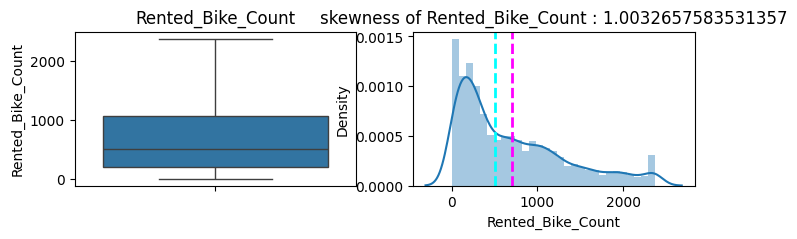

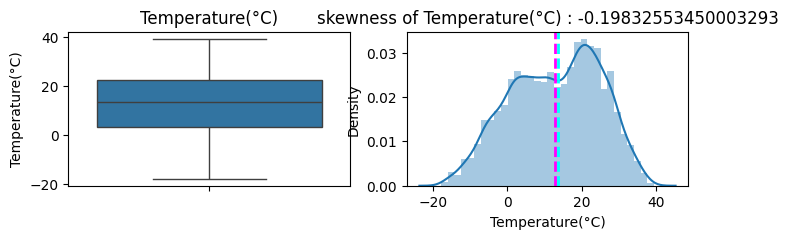

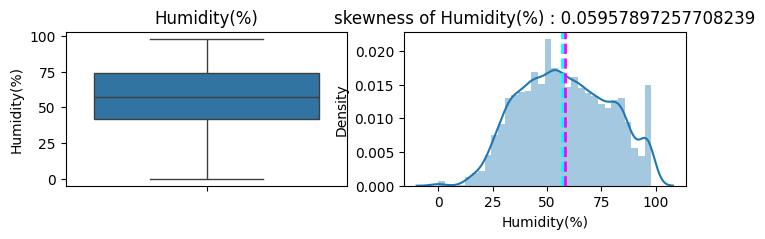

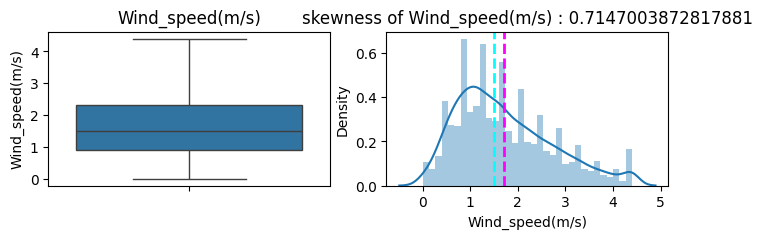

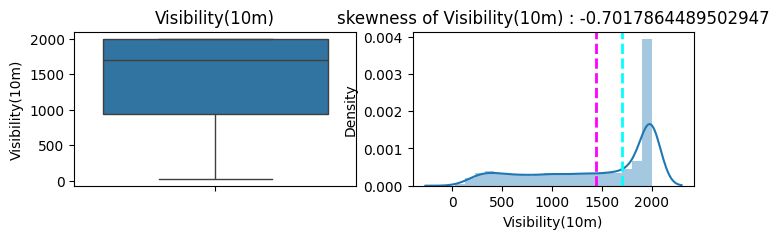

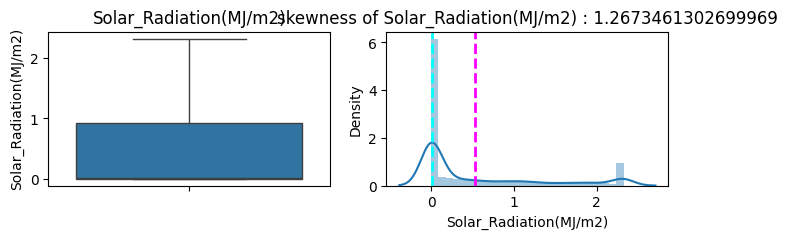

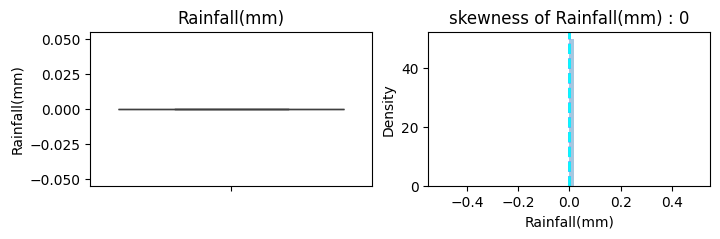

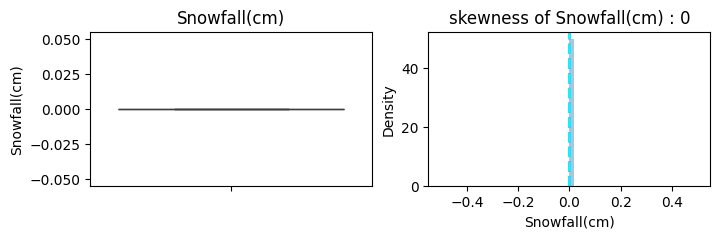

In [43]:
# Checking for distribution and the skewness

# Plotting Box plot and Distribution plot
for var in numerical_variables_updated:
  plt.figure(figsize = (8,2))
  plt.subplot(1,2,1)
  ax=sns.boxplot(data = bike_df[var])
  ax.set_title(f'{var}')
  ax.set_ylabel(var)

  plt.subplot(1, 2, 2)
  # plt.figure(figsize = (6,4))
  ax=sns.distplot(bike_df[var])   # fit = norm
  ax.axvline(bike_df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(bike_df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(f'skewness of {var} : {bike_df[var].skew()}')
  plt.show()

In [44]:
# Initialize an empty list to store skewness information
skewness_info_after = []

# Calculate skewness for each numerical feature
for var in numerical_variables_updated:
    # Calculate skewness
    skewness = bike_df[var].skew()
    skewness_type = "Neutral"
    if skewness > 0:
        skewness_type = "Positive"
    elif skewness < 0:
        skewness_type = "Negative"

    # Append skewness information to the list
    skewness_info_after.append([var, skewness, skewness_type])

# Create a DataFrame to display skewness information
skewness_after_df = pd.DataFrame(skewness_info_after, columns=['Variable', 'Skewness', 'Skewness Type'])

# Display the DataFrame
print(skewness_after_df)

                 Variable  Skewness Skewness Type
0       Rented_Bike_Count  1.003266      Positive
1         Temperature(°C) -0.198326      Negative
2             Humidity(%)  0.059579      Positive
3         Wind_speed(m/s)  0.714700      Positive
4         Visibility(10m) -0.701786      Negative
5  Solar_Radiation(MJ/m2)  1.267346      Positive
6            Rainfall(mm)  0.000000       Neutral
7            Snowfall(cm)  0.000000       Neutral


In [45]:
# Display the first few rows of the modified DataFrame
bike_df.head()

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_Weekend
0,254.0,0,-5.2,37.0,2.2,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
1,204.0,1,-5.5,38.0,0.8,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
2,173.0,2,-6.0,39.0,1.0,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
3,107.0,3,-6.2,40.0,0.9,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
4,78.0,4,-6.0,36.0,2.3,2000.0,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0


In [46]:
# Display unique values in the 'Rainfall(mm)' column
unique_rainfall_values = bike_df['Rainfall(mm)'].unique()
print(unique_rainfall_values)

[0.]


In [47]:
# Normalizing the diffrent numerical columns

# Transforming distribution to normal using different transformations

# For positively skewed data
bike_df['Rented_Bike_Count'] = (bike_df['Rented_Bike_Count'] + 1).transform(np.sqrt)
bike_df['Wind_speed(m/s)'] = (bike_df['Wind_speed(m/s)'] + 1).transform(np.log)
bike_df['Solar_Radiation(MJ/m2)'] = (bike_df['Solar_Radiation(MJ/m2)'] + 1).transform(np.log)

# For negatively skewed data
bike_df['Visibility(10m)'] = (max(bike_df['Visibility(10m)']) + 1 - bike_df['Visibility(10m)']).transform(np.sqrt)

# For highly skewed data
bike_df['Rainfall(mm)'] = (bike_df['Rainfall(mm)'] + 1).transform(np.log)
bike_df['Snowfall(cm)'] = (bike_df['Snowfall(cm)'] + 1).transform(np.log)

                 Variable  Skewness Skewness Type
0       Rented_Bike_Count  0.210836      Positive
1         Temperature(°C) -0.198326      Negative
2             Humidity(%)  0.059579      Positive
3         Wind_speed(m/s) -0.036892      Negative
4         Visibility(10m)  0.168628      Positive
5  Solar_Radiation(MJ/m2)  0.968343      Positive
6            Rainfall(mm)  0.000000       Neutral
7            Snowfall(cm)  0.000000       Neutral


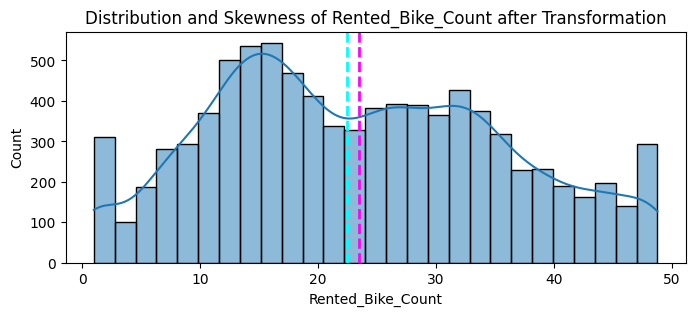

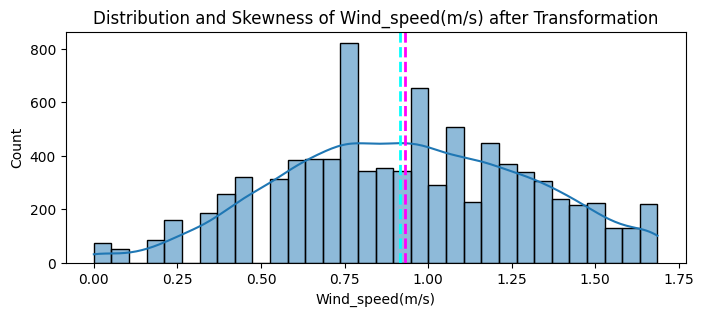

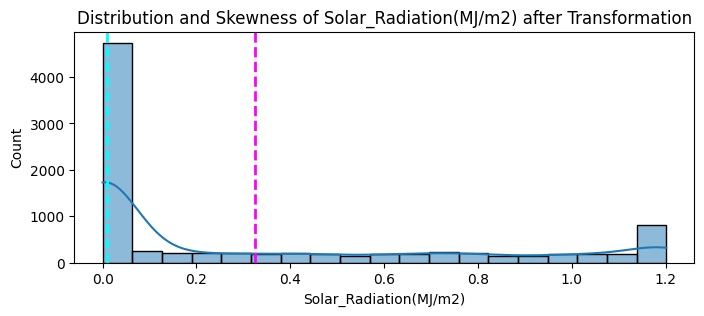

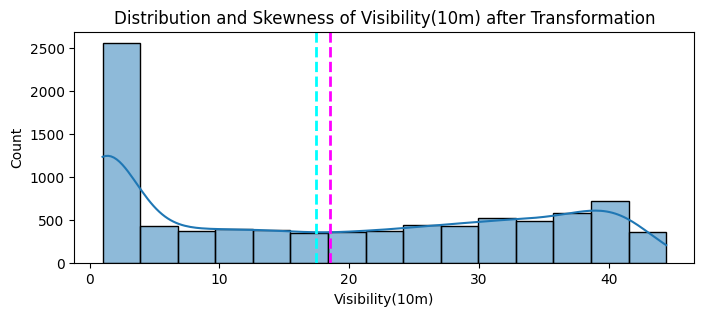

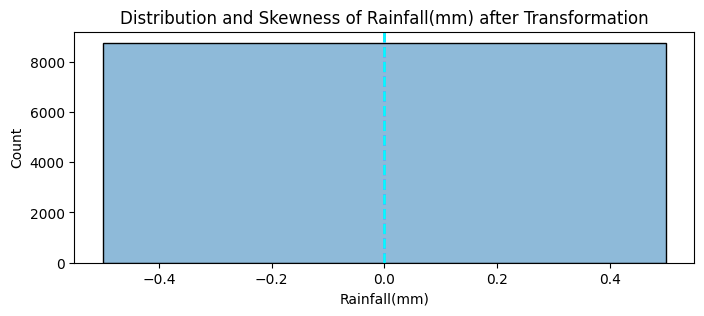

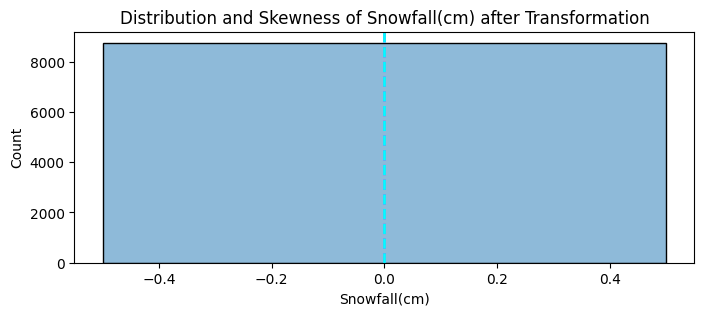

In [48]:
# Assuming bike_df is your DataFrame

# Function to calculate skewness and its type
def calculate_skewness(df):
    skewness_info = []
    for var in df.select_dtypes(include=[np.number]).columns:
        skewness = df[var].skew()
        if skewness > 0:
            skewness_type = "Positive"
        elif skewness < 0:
            skewness_type = "Negative"
        else:
            skewness_type = "Neutral"
        skewness_info.append([var, skewness, skewness_type])
    return pd.DataFrame(skewness_info, columns=['Variable', 'Skewness', 'Skewness Type'])

# Check skewness after transformation
skewness_after_transform = calculate_skewness(bike_df)
print(skewness_after_transform)

# Plotting to visualize the distributions
for var in ['Rented_Bike_Count', 'Wind_speed(m/s)', 'Solar_Radiation(MJ/m2)', 'Visibility(10m)', 'Rainfall(mm)', 'Snowfall(cm)']:
    plt.figure(figsize=(8, 3))

    # Distribution plot
    sns.histplot(bike_df[var], kde=True)
    plt.axvline(bike_df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(bike_df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    plt.title(f'Distribution and Skewness of {var} after Transformation')
    plt.show()

In [49]:
bike_df

,Rented_Bike_Count,Hour,Temperature(°C),Humidity(%),Wind_speed(m/s),Visibility(10m),Solar_Radiation(MJ/m2),Rainfall(mm),Snowfall(cm),Seasons,Holiday,Functioning_Day,Month,Day,Weekdays_Weekend
0,15.968719,0,-5.2,37.0,1.163151,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
1,14.317821,1,-5.5,38.0,0.587787,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
2,13.190906,2,-6.0,39.0,0.693147,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
3,10.392305,3,-6.2,40.0,0.641854,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
4,8.888194,4,-6.0,36.0,1.193922,1.000000,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31.685959,19,4.2,34.0,1.280934,10.344080,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0
8756,27.658633,20,3.4,37.0,1.193922,1.000000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0
8757,26.362853,21,2.6,39.0,0.262364,5.744563,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0
8758,26.702060,22,2.1,41.0,0.693147,11.916375,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,Friday,0


In [50]:
# Save DataFrame to CSV locally in Colab
local_file_path = 'bike_df.csv'
bike_df.to_csv(local_file_path, index=False)

# Download the CSV file locally
from google.colab import files
files.download(local_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusions:**

1. **Peak Rental Times:** There is a higher demand for bike rentals in the evening. This suggests that many users might be using the service for commuting back home or leisure activities after work.

2. **Seasonal and Monthly Trends:**
  - Bike rentals peak during the summer months, especially in June, indicating that warmer weather encourages more bike usage.
  - Rentals are more frequent on weekdays, particularly when there are no holidays. This aligns with the idea that many users might be using bikes for commuting purposes.

3. **Day of the Week Insights:** Sunday is the least popular day for bike rentals. This information could be useful for planning maintenance or other non-peak operations.

4. **Temperature Impact:** The most popular temperature for bike rentals is around 25°C. This could be leveraged for marketing campaigns during similar weather conditions.

5. **Environmental Factors:**
  - High solar radiation correlates with a significant increase in bike rentals, with counts around 1000. This suggests that sunny days are very favorable for biking.
  - There is a noticeable drop in bike rentals when snowfall exceeds 4 cm. This information can be crucial for managing inventory and planning during snowy conditions.
  - Despite heavy rainfall (up to 20 mm), bike rentals do not significantly decrease, showing that many customers are willing to rent bikes even in wet conditions.
  - The demand for bikes is relatively stable across different wind speeds, but there is an increase when the wind speed is around 7 m/s, indicating a preference for mildly windy conditions.

6. **Feature Relationships:**
  - Bike rentals increase with higher temperatures, wind speeds, dew point temperatures, and solar radiation. This suggests that pleasant weather conditions encourage more biking.
  - Conversely, rentals decrease with higher humidity, visibility, rainfall, and snowfall. Adverse weather conditions generally reduce bike usage.

7. **Feature Optimization**: Dropped 'Dew_point_temperature(°C)': Due to its high multicollinearity with 'Temperature(°C)', simplifying the model without losing predictive power.

#### **Actionable Recommendations:**

* **Marketing and Promotions:** Focus marketing efforts on promoting bike rentals during the evening hours, summer months, and weekdays. Highlight the benefits of biking in mild, sunny weather to attract more users.

* **Operational Planning:** Allocate more bikes and resources during peak times (evenings and summer) and maintain a lower inventory on Sundays. Prepare for reduced demand during heavy snow but not necessarily during rain.

* **Weather-Based Strategies:** Develop strategies to manage bike availability and maintenance based on weather forecasts. For example, increase bike availability on sunny days and ensure proper maintenance before expected snowy days.

* **User Experience:** Enhance user experience by providing weather-related information and suggestions, such as recommending optimal biking times and routes based on current weather conditions.

By addressing these insights, the bike-sharing service can optimize operations, enhance user satisfaction, and improve overall service efficiency.